# Case Study on Probability for Data Science

**Problem Statement:**
To make a suitable machine learning algorithm to predict if the mushroom is
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

In [1]:
# import the required all libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the mushrooms data csv files into pandas dataframe
mush_df=pd.read_csv('mushrooms.csv')

In [3]:
# Display the data
mush_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
# number of elements in each dimension (Rows and Columns)
mush_df.shape

(8124, 23)

In [5]:
# Summary of the data
mush_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

The dataset consists of 8124 training examples, each representing a single mushroom. The first column is the target variable containing the class labels, identifying whether the mushroom is poisonous or edible. The remaining columns are 22 features that describe the mushroom in some observable way; their values are encoded by characters.

**Attribute Information:**

- cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
- cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
- cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u,
red=e, white=w, yellow=y
- bruises: bruises=t, no=f
- odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n,
pungent=p, spicy=s
- gill-attachment: attached=a, descending=d, free=f, notched=n
- gill-spacing: close=c, crowded=w, distant=d
- gill-size: broad=b, narrow=n
- gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o,
pink=p, purple=u, red=e, white=w, yellow=y
- stalk-shape: enlarging=e, tapering=t
- Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r,
missing=?
- stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
- stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

- stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,
pink=p, red=e, white=w, yellow=y
- stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,
pink=p, red=e, white=w, yellow=y
- veil-type: partial=p, universal=u
- veil-colour: brown=n, orange=o, white=w, yellow=y
- ring-number: none=n, one=o, two=t
- ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p,
sheathing=s, zone=z
- spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o,
purple=u, white=w, yellow=y
- population: abundant=a, clustered=c, numerous=n, scattered=s, several=v,
solitary=y
- habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w,
woods=d

the target variable 'class' feature contains discrete values, we'll need to train a classifier.

In [6]:
# The Statistical summary of mushroom dataset
mush_df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
# Calculating the null values present in each columns in the dataset
mush_df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

As you can see that there is no null or missing values present in the dataset.

In [8]:
# let's check any special characters present in the dataset.
for column in mush_df.columns:
    print(f"{column} -> {mush_df[column].nunique()}, {mush_df[column].unique()}")

class -> 2, ['p' 'e']
cap-shape -> 6, ['x' 'b' 's' 'f' 'k' 'c']
cap-surface -> 4, ['s' 'y' 'f' 'g']
cap-color -> 10, ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises -> 2, ['t' 'f']
odor -> 9, ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment -> 2, ['f' 'a']
gill-spacing -> 2, ['c' 'w']
gill-size -> 2, ['n' 'b']
gill-color -> 12, ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape -> 2, ['e' 't']
stalk-root -> 5, ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring -> 4, ['s' 'f' 'k' 'y']
stalk-surface-below-ring -> 4, ['s' 'f' 'y' 'k']
stalk-color-above-ring -> 9, ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring -> 9, ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type -> 1, ['p']
veil-color -> 4, ['w' 'n' 'o' 'y']
ring-number -> 3, ['o' 't' 'n']
ring-type -> 5, ['p' 'e' 'l' 'f' 'n']
spore-print-color -> 9, ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population -> 6, ['s' 'n' 'a' 'v' 'y' 'c']
habitat -> 7, ['u' 'g' 'm' 'd' 'p' 'w' 'l']


From the above observation, it is clear that stalk-root -> 5, ['e' 'c' 'b' 'r' '?'] is having a missing identifier.

And also, the veil_type variable, it has only one factor. So basically, it does not bring any information. Furthermore, factor variable with only one level do create issues later on at the modeling stage.

In [9]:
# check the values count os stalk root feature
mush_df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

There are 2480 missing values present in "stalk-root" column, so it is not good to treat it with median or mode. Best approach will be to make "?" it self as a class and consider for model.

In [10]:
# replace "?" as missing
mush_df['stalk-root'].replace("?","missing" ,inplace=True)
# check the values count os stalk root feature after replacement
mush_df['stalk-root'].value_counts()

b          3776
missing    2480
e          1120
c           556
r           192
Name: stalk-root, dtype: int64

In [11]:
# now, let's check the target feature values count
mush_df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

As we can see, there are two unique values in the ‘class’ column of the dataset namely:
‘p’ -> poisonous and ‘e’ -> edible

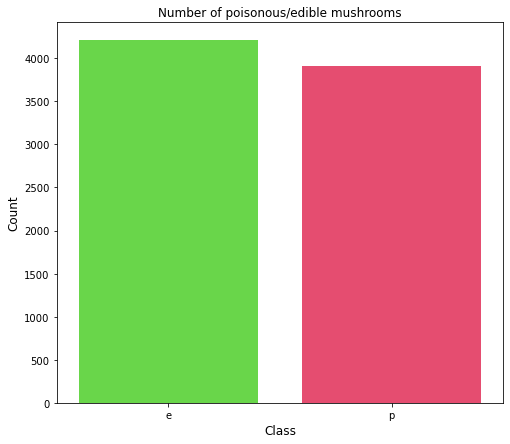

In [12]:
# visualize the count of edible and poisonous mushrooms using Seaborn
count = mush_df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

From the bar plot, we see that the dataset is balanced.

### Feature Selection

In [13]:
X = mush_df.drop(['class', 'veil-type'], axis=1)
y = mush_df['class']

The data is categorical so we’ll use either we use onehot encoder or label encoder and  to convert it to ordinal. 

when using onehot encoding we can have two classes but if we have more than two classes we can go for Label encoding.

So our data has different classes like two or more.

In [14]:
# let's check the one hot and label encoding features
onehot_columns = []
label_columns = []
for column in X.columns:

    # for getting one hot encoding features for two classes and more than two classes for label encoding
    label_columns.append(column) if X[column].nunique()>3 else onehot_columns.append(column)
    
print(f"Onehot columns = {onehot_columns}")
print(f"Label columns = {label_columns}")

Onehot columns = ['bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape', 'ring-number']
Label columns = ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-type', 'spore-print-color', 'population', 'habitat']


As per the analysis, there are 6 features are having two classes and 15 features are having more than two classes.

In [15]:
# One hot encoder
X = pd.get_dummies(data = X, columns = onehot_columns)

In [16]:
#Label encoding
for column in label_columns:
    X[column] = LabelEncoder().fit_transform(X[column])

In [17]:
# let's check the data is encoded or not
X

,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,...,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,stalk-shape_e,stalk-shape_t,ring-number_n,ring-number_o,ring-number_t
0,5,2,4,6,4,2,2,2,7,7,...,1,1,0,0,1,1,0,0,1,0
1,5,2,9,0,4,1,2,2,7,7,...,1,1,0,1,0,1,0,0,1,0
2,0,2,8,3,5,1,2,2,7,7,...,1,1,0,1,0,1,0,0,1,0
3,5,3,8,6,5,2,2,2,7,7,...,1,1,0,0,1,1,0,0,1,0
4,5,2,3,5,4,2,2,2,7,7,...,1,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,5,11,3,2,2,5,5,...,0,1,0,1,0,1,0,0,1,0
8120,5,2,4,5,11,3,2,2,5,5,...,0,1,0,1,0,1,0,0,1,0
8121,2,2,4,5,5,3,2,2,5,5,...,0,1,0,1,0,1,0,0,1,0
8122,3,3,4,8,0,3,2,1,7,7,...,1,1,0,0,1,0,1,0,1,0


As you can see it is well encoded with one hot and label encoder

Now, we can split the data into train(80% of the data) and test (20% of the data)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Classification Methods

### 1. Decision Tree Classification

In [19]:
# Decision Tree Classification
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Feature Importance


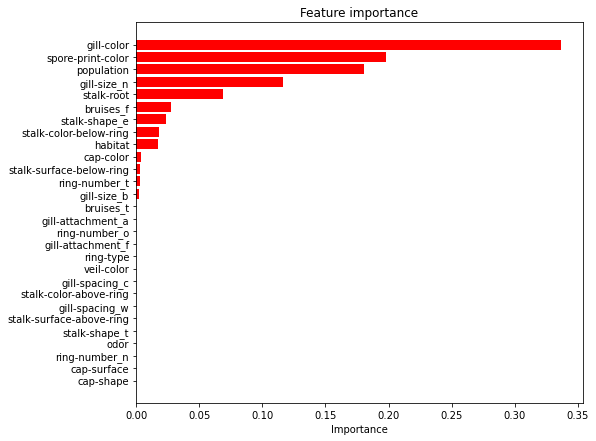

In [20]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

By all methods examined before the most important feature is “gill-color”.

In [21]:
# Predicting and estimating the result
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Test Accuracy: 100.0%


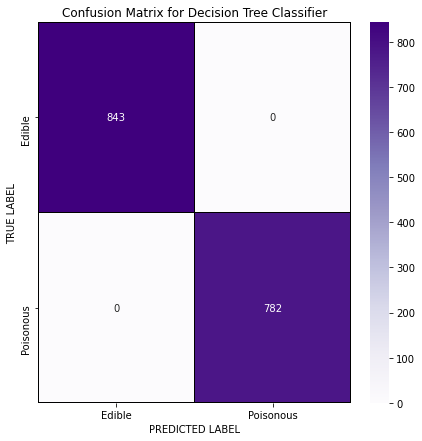

In [22]:
# Confusion Matrix for Decision Tree Classifier
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

From above Confusion Matrix for Decision Tree Classifier, we can clearly see that, it is predicted 100% accuracy with no miss classifications

### 2. Logistic Regression Classification

In [23]:
# Logistic Regression Classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=100)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 96.31%


In [24]:
# Classification report of Logistic Regression Classifier
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           e       0.98      0.95      0.96       843
           p       0.95      0.98      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



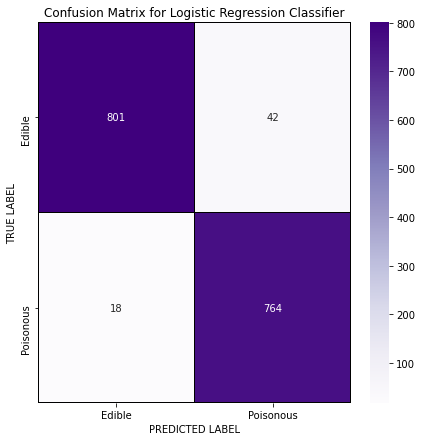

In [25]:
# Classification report of Logistic Regression Classifier
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

From above Confusion Matrix for Logistic Regression Classifier, we can clearly see that, it is predicted 96.31% accuracy with 60 miss classifications

### 3. KNN Classification

In [26]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [27]:
# Classification report of KNN Classifier
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



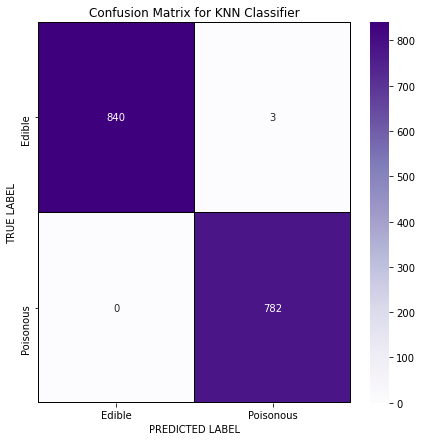

In [28]:
# Confusion Matrix for KNN Classifier
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

From above Confusion Matrix for KNN Classifier, we can clearly see that, it is predicted 100% accuracy with just 3 miss classifications.

### 4. SVM Classification

In [29]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [30]:
# Classification report of SVM Classifier
y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



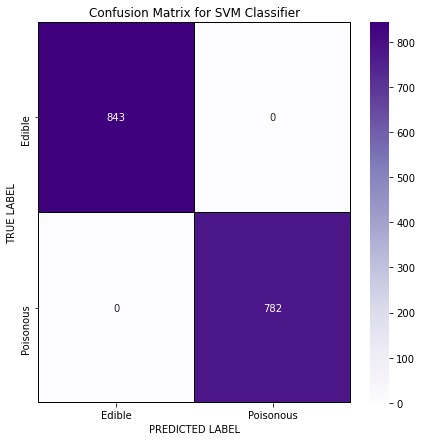

In [31]:
# Confusion Matrix for SVM Classifier
cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

From above Confusion Matrix for SVM Classifier, we can clearly see that, it is predicted 100% accuracy with no miss classifications

### 5. Naive Bayes Classification

In [32]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Test Accuracy: 92.12%


In [33]:
# Classification report of Naive Bayes Classifier
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           e       0.90      0.96      0.93       843
           p       0.95      0.88      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



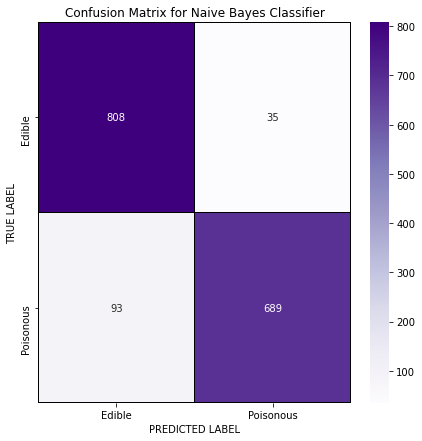

In [34]:
# Confusion Matrix for Naive Bayes Classifier
cm = confusion_matrix(y_test, y_pred_nb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

From above Confusion Matrix for Naive Bayes Classifier, we can clearly see that, it is predicted  92.12% accuracy with more than 100 miss classifications.

### 6. Random Forest Classification

In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [36]:
# Classification report of Random Forest Classifier
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



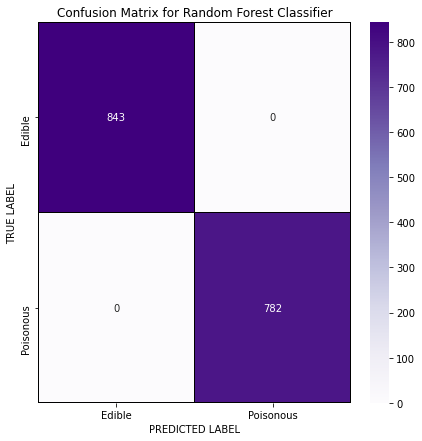

In [37]:
# Confusion Matrix for Random Forest Classifier
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
plt.show()

From above Confusion Matrix for Random Forest Classifier, we can clearly see that, it is predicted 100% accuracy with no miss classifications

Predicting some of the X_test results and matching it with true i.e. y_test values using Decision Tree Classifier.

In [38]:
preds = dt.predict(X_test)
print(f"Predicted values = {preds[:36]}")
print(f"True values = {y_test[:36].values}")
# 0 - Edible(e)
# 1 - Poisonous(p)

Predicted values = ['e' 'p' 'p' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p'
 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'e' 'e' 'e' 'p']
True values = ['e' 'p' 'p' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p'
 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'e' 'e' 'e' 'p']


As we can see that, the predicted and the true values match 100%. So we can say that it is well predicted with mushroom dataset.

### Conclusion

From the confusion matrix, we saw that our train and test data is balanced.

Most of the classification methods hit 100% accuracy with this dataset.
1. Decision Tree Classification - Test Accuracy: 100.0% with no miss classifications
2. KNN Classification - Test Accuracy: 100.0% with just 3 miss classifications
3. SVM Classification - Test Accuracy: 100.0% with no miss classifications
4. Random Forest Classification - Test Accuracy: 100.0% with no miss classifications

Now, We can eat healthy mushrooms!